##### Summary of the work
#### Work was divided into different catagories:
We divided the work into two different categories:
Initial data Analysis and observations.
                a)	Look at the different dataset
                     Read all four datasets (csv files) as Data Frame 
                     Only one dataset ‘Stats and Weather Data.csv’ was relevant to our re-search

                b)	Draw bar graphs
                c)	There were NAN values. These NaN values making the r values to be Nan
                d)	Clean up data
2)	Statistical test – Calculating P-values.


In [ ]:
##### Copy from jennifer
#### 

Null Hypothesis: If adverse weather is not related to the performance of players, game statistics will not be significantly different when playing in adverse weather conditions.

Alternate Hypothesis: If adverse weather conditions are related to player performance then extremes in temperature, precipitation or high winds will result in poorer performances in comparison to neutral weather conditions

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
import json
from pprint import pprint


#### Initial Data Analysis --- Reading data from different data Sets (Part 1) --- Category - 1

In [ ]:
# Read the file data_resources/combined_playerStats_weatherData.csv"
# Four dataSet are created

##### File 1 -- Data Set 1 ---- combined_playerStats_weatherData.csv

In [2]:
# File 1 -- Data Set 1
path_stats_file = "data_resources/combined_playerStats_weatherData.csv"
combined_playerStats_weatherData_pd = pd.read_csv(path_stats_file)
combined_playerStats_weatherData_pd.head()


,Unnamed: 0,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
0,0,3603,2015,1,Kaepernick,C,QB,7,Vikings,49ers,...,0,0,0,83.012821,2015,Regular,Grass,66.2,mostly cloudy,9.2
1,1,3603,2015,1,Hyde,C,RB,28,Vikings,49ers,...,2,14,0,NaN,2015,Regular,Grass,66.2,mostly cloudy,9.2
2,2,3603,2015,1,Bush,R,RB,25,Vikings,49ers,...,0,0,0,NaN,2015,Regular,Grass,66.2,mostly cloudy,9.2
3,3,3603,2015,1,Hayne,Jarryd,RB,0,Vikings,49ers,...,1,7,0,NaN,2015,Regular,Grass,66.2,mostly cloudy,9.2
4,4,3603,2015,1,Celek,G,TE,81,Vikings,49ers,...,3,40,0,NaN,2015,Regular,Grass,66.2,mostly cloudy,9.2


##### File 2 -- Data Set 2 ---- player_game_stats.csv

In [3]:
# File 2  -- Data Set 2
path_stats_file = "data_resources/player_game_stats.csv"
player_game_stats_pd = pd.read_csv(path_stats_file)
player_game_stats_pd.head()

,Unnamed: 0,gameId,season,week,lastName,firstName,position,uniformNumber,opponent,team,...,passTds,ints,sacks,sackYds,rush,rushYds,rushTds,rec,recYds,recTds
0,0,3603,2015,1,Kaepernick,C,QB,7,Vikings,49ers,...,0,0,1,0,7,41,0,0,0,0
1,1,3603,2015,1,Hyde,C,RB,28,Vikings,49ers,...,0,0,0,0,26,168,2,2,14,0
2,2,3603,2015,1,Bush,R,RB,25,Vikings,49ers,...,0,0,0,0,2,8,0,0,0,0
3,3,3603,2015,1,Hayne,Jarryd,RB,0,Vikings,49ers,...,0,0,0,0,4,13,0,1,7,0
4,4,3603,2015,1,Celek,G,TE,81,Vikings,49ers,...,0,0,0,0,0,0,0,3,40,0


##### File 3 -- Data Set 3 ---- QB Stats and Weather Data.csv

In [52]:
#File 3 --- DataSet 3
#File name = QB Stats and Weather Data.csv
path_weather_QB_file = "data_resources/QB Stats and Weather Data.csv"
weather_QB_pd = pd.read_csv(path_weather_QB_file)
weather_QB_pd.head()

,Unnamed: 0,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
0,0,3603,2015,1,Kaepernick,C,QB,7,Vikings,49ers,...,0,0,0,83.012821,2015,Regular,Grass,66.2,mostly cloudy,9.2
1,1,3590,2015,1,Cutler,J,QB,6,Packers,Bears,...,0,0,0,67.476852,2015,Regular,Grass,69.1,mostly cloudy,8.1
2,2,3599,2015,1,Dalton,A,QB,14,Raiders,Bengals,...,0,0,0,115.931373,2015,Regular,Grass,64.0,scattered clouds,15.0
3,3,3589,2015,1,Taylor,T,QB,2,Colts,Bills,...,0,0,0,123.793860,2015,Regular,Turf,53.1,light rain,13.8
4,4,3598,2015,1,Manning,P,QB,18,Ravens,Broncos,...,0,0,0,59.895833,2015,Regular,Grass,82.9,mostly cloudy,11.5


In [51]:
weather_QB_pd["QB Rating"].max()


158.33333333333331

##### QB Stats and Weather Data.csv -- Columns

In [7]:
weather_QB_pd.columns

Index(['Unnamed: 0', 'gameId', 'season_x', 'week', 'lastName', 'firstName',
       'position', 'uniformNumber', 'opponent', 'team', 'att', 'comp',
       'passYds', 'passTds', 'ints', 'sacks', 'sackYds', 'rush', 'rushYds',
       'rushTds', 'rec', 'recYds', 'recTds', 'QB Rating', 'season_y', 'type',
       'surface', 'temperature', 'conditions', 'windSpeed'],
      dtype='object')

##### File 4 -- Data Set 4---- weather_data.csv

In [4]:
#File 4 --- Data Set 4 ... Only weather Data
#File name = QB Stats and Weather Data.csv
path_weather_file = "data_resources/weather_data.csv"
weather_pd = pd.read_csv(path_weather_QB_file)
weather_pd.head()

,Unnamed: 0,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
0,0,3603,2015,1,Kaepernick,C,QB,7,Vikings,49ers,...,0,0,0,83.012821,2015,Regular,Grass,66.2,mostly cloudy,9.2
1,11,3590,2015,1,Cutler,J,QB,6,Packers,Bears,...,0,0,0,67.476852,2015,Regular,Grass,69.1,mostly cloudy,8.1
2,22,3599,2015,1,Dalton,A,QB,14,Raiders,Bengals,...,0,0,0,115.931373,2015,Regular,Grass,64.0,scattered clouds,15.0
3,32,3589,2015,1,Taylor,T,QB,2,Colts,Bills,...,0,0,0,123.793860,2015,Regular,Turf,53.1,light rain,13.8
4,42,3598,2015,1,Manning,P,QB,18,Ravens,Broncos,...,0,0,0,59.895833,2015,Regular,Grass,82.9,mostly cloudy,11.5


#### Initial Data Analysis --- Draw bar graph ---  Category - 1 (Part 2)

##### Get the selected columns from the big dataset to create a new smaller dataset

In [7]:
QB_R_weather =weather_QB_pd[["QB Rating","temperature" , "conditions","windSpeed"]]
QB_R_weather

,QB Rating,temperature,conditions,windSpeed
0,83.012821,66.2,mostly cloudy,9.20
1,67.476852,69.1,mostly cloudy,8.10
2,115.931373,64.0,scattered clouds,15.00
3,123.793860,53.1,light rain,13.80
4,59.895833,82.9,mostly cloudy,11.50
...,...,...,...,...
2313,90.972222,39.0,overcast clouds,14.99
2314,116.796875,57.0,broken clouds,6.93
2315,87.847222,57.0,broken clouds,4.70
2316,89.155983,39.0,overcast clouds,6.93


##### Check the weather condition in a smaller dataset and count of each condition

In [8]:
R= QB_R_weather["conditions"].value_counts()
x=pd.DataFrame(R)
x

,conditions
clear sky,786
overcast,392
mostly cloudy,227
partly cloudy,219
scattered clouds,138
overcast clouds,120
broken clouds,95
light rain,83
few clouds,61
rain,57


In [9]:
len(QB_R_weather["conditions"])


2318

##### count of all columns in a samller dataset before filtering: The conditions column has many conditions like  light snow, cold, fog, shower rain, overcast cloud and clear sky. We wasnt to limit analysis on three condition

In [10]:
QB_R_weather_count = QB_R_weather.count()
Count_all_condition = pd.DataFrame(QB_R_weather_count)
Count_all_condition 

,0
QB Rating,2318
temperature,2318
conditions,2318
windSpeed,2313


##### The conditions column has many conditions like  light snow, cold, fog, shower rain, overcast cloud and clear sky. We want to limit our analysis on three condition. Limit to only three condition clear sky, overcast clouds, light snow
#### Example1 =QB_R_weather.query('conditions == "clear sky" or conditions == "overcast clouds" or conditions == "light snow" ')

###### Example2 = weather_QB_pd.query(('lastName == "Kaepernick" and  season_y == 2015' ) )
###### Example3 weather_QB_pd.query('conditions == "clear sky" or conditions == "overcast clouds" or conditions == "light snow"  and lastName == "Manziel" ')


In [11]:
# Narrow the condition:
QB_R_weather_con_3 = QB_R_weather.query('conditions == "clear sky" or conditions == "overcast clouds" or conditions == "light snow" ')
QB_R_weather_con_3

,QB Rating,temperature,conditions,windSpeed
5,75.347222,75.9,clear sky,11.50
7,102.777778,82.0,clear sky,8.10
11,95.659722,75.9,clear sky,11.50
12,83.472222,82.0,clear sky,8.10
27,86.898148,84.0,clear sky,13.80
...,...,...,...,...
2306,97.253788,65.0,overcast clouds,5.82
2307,76.348039,35.0,overcast clouds,3.36
2311,127.361111,35.0,overcast clouds,3.36
2313,90.972222,39.0,overcast clouds,14.99


<BarContainer object of 922 artists>

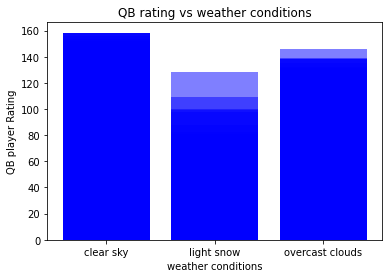

In [53]:
plt.title("QB rating vs weather conditions")
plt.xlabel("weather conditions")
plt.ylabel("QB player Rating")
plt.bar(QB_R_weather_con_3["conditions"], QB_R_weather_con_3["QB Rating"], color='b', alpha=0.5, align="center")


##### Data Cleanup ### Remove nan from the master dataset


In [28]:
 weather_QB_pd
y =  weather_QB_pd.query(('lastName == "Kaepernick" and  season_y == 2015' ) )
y

,Unnamed: 0,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
0,0,3603,2015,1,Kaepernick,C,QB,7,Vikings,49ers,...,0,0,0,83.012821,2015,Regular,Grass,66.2,mostly cloudy,9.2
23,34,3607,2015,2,Kaepernick,C,QB,7,Steelers,49ers,...,0,0,0,106.702899,2015,Regular,Grass,66.9,partly cloudy,5.8
75,98,3645,2015,4,Kaepernick,C,QB,7,Packers,49ers,...,0,0,0,55.416667,2015,Regular,Grass,70.0,scattered clouds,15.0
97,129,3663,2015,5,Kaepernick,C,QB,7,Giants,49ers,...,0,0,0,107.083333,2015,Regular,Turf,57.9,clear sky,4.6
117,159,3676,2015,6,Kaepernick,C,QB,7,Ravens,49ers,...,0,0,0,128.240741,2015,Regular,Grass,66.9,scattered clouds,12.7
139,187,3679,2015,7,Kaepernick,C,QB,7,Seahawks,49ers,...,0,0,0,68.750000,2015,Regular,Grass,63.0,clear sky,5.8


In [34]:
weather_QB_pd.query('conditions == "clear sky" or conditions == "overcast clouds" or conditions == "light snow"  and lastName == "Manziel" ')

,Unnamed: 0,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
5,5,3593,2015,1,Manziel,J,QB,2,Jets,Browns,...,0,0,0,75.347222,2015,Regular,Turf,75.9,clear sky,11.50
7,8,3597,2015,1,Rivers,P,QB,17,Lions,Chargers,...,0,0,0,102.777778,2015,Regular,Grass,82.0,clear sky,8.10
11,17,3593,2015,1,Fitzpatrick,R,QB,12,Browns,Jets,...,0,0,0,95.659722,2015,Regular,Turf,75.9,clear sky,11.50
12,18,3597,2015,1,Stafford,M,QB,9,Chargers,Lions,...,0,0,0,83.472222,2015,Regular,Grass,82.0,clear sky,8.10
27,38,3604,2015,2,Manning,P,QB,18,Chiefs,Broncos,...,0,0,0,86.898148,2015,Regular,Grass,84.0,clear sky,13.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306,3127,5464,2020,17,Ryan,M,QB,2,Buccaneers,Falcons,...,0,0,0,97.253788,2020,Regular,Grass,65.0,overcast clouds,5.82
2307,3129,5461,2020,17,Darnold,Sam,QB,14,Patriots,Jets,...,0,0,0,76.348039,2020,Regular,Turf,35.0,overcast clouds,3.36
2311,3134,5461,2020,17,Newton,C,QB,1,Jets,Patriots,...,1,19,1,127.361111,2020,Regular,Turf,35.0,overcast clouds,3.36
2313,3137,5455,2020,17,Jackson,Lamar,QB,8,Bengals,Ravens,...,0,0,0,90.972222,2020,Regular,Turf,39.0,overcast clouds,14.99


In [58]:
weather_QB_pd.dropna(inplace=True)
weather_QB_pd

,Unnamed: 0,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
0,0,3603,2015,1,Kaepernick,C,QB,7,Vikings,49ers,...,0,0,0,83.012821,2015,Regular,Grass,66.2,mostly cloudy,9.20
1,1,3590,2015,1,Cutler,J,QB,6,Packers,Bears,...,0,0,0,67.476852,2015,Regular,Grass,69.1,mostly cloudy,8.10
2,2,3599,2015,1,Dalton,A,QB,14,Raiders,Bengals,...,0,0,0,115.931373,2015,Regular,Grass,64.0,scattered clouds,15.00
3,3,3589,2015,1,Taylor,T,QB,2,Colts,Bills,...,0,0,0,123.793860,2015,Regular,Turf,53.1,light rain,13.80
4,4,3598,2015,1,Manning,P,QB,18,Ravens,Broncos,...,0,0,0,59.895833,2015,Regular,Grass,82.9,mostly cloudy,11.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,3137,5455,2020,17,Jackson,Lamar,QB,8,Bengals,Ravens,...,0,0,0,90.972222,2020,Regular,Turf,39.0,overcast clouds,14.99
2314,3138,5453,2020,17,Brees,D,QB,9,Panthers,Saints,...,0,0,0,116.796875,2020,Regular,Grass,57.0,broken clouds,6.93
2315,3139,5467,2020,17,Wilson,R,QB,3,49ers,Seahawks,...,0,0,0,87.847222,2020,Regular,Grass,57.0,broken clouds,4.70
2316,3140,5456,2020,17,Rudolph,Mason,QB,2,Browns,Steelers,...,0,0,0,89.155983,2020,Regular,Grass,39.0,overcast clouds,6.93


#### Identify the appropriate statistical test

##### statistical test 1 --- Scatter Plot QB Rating vs Temperature
#Draw a  graph QB rating for against temperature
Data Set name = weather_QB_pd

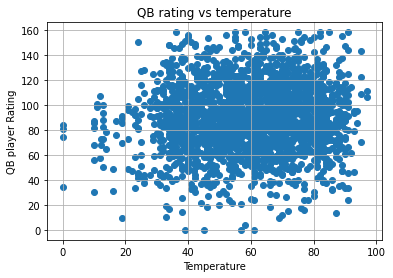

In [37]:
plt.title("QB rating vs temperature")
plt.xlabel("Temperature")
plt.ylabel("QB player Rating")
plt.scatter(weather_QB_pd["temperature"], weather_QB_pd["QB Rating"])
plt.grid(True)
plt.show()

##### Linear Regression -- QB Rating vs Temperature
##### Draw a  graph QB rating for against temperature
Data Set name = weather_QB_pd

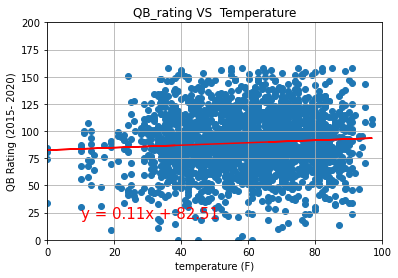

The r-squared value is: 0.00520061201186168
The p value value of QB_rating' VS  Temperature: 0.0005186551603473037


In [59]:
x_values= weather_QB_pd["temperature"]
y_values= weather_QB_pd["QB Rating"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.title("QB_rating VS  Temperature")
plt.xlabel('temperature (F)')
plt.ylabel('QB Rating (2015- 2020)')
plt.xlim(0,100)
plt.ylim(0,200)
plt.grid(True)
plt.show()
print(f"The r-squared value is: {rvalue**2}")
print(f"The p value value of QB_rating' VS  Temperature: {pvalue}")
           


##### Graph -1 --- Scatter plot between QB rating and Temperture to identify the Linear Regression and  find the relationship between QB Rating ## and Temperature.
###### Result : r squre value = 0.005
##### There is a very little correlation between QB rating and Temperture.
###### Any estimate of a player's QB rating based on temperature would be only 0.005 correct based on R value.

##### Analysis of the r - value between Temperature and QB rating. The relationship between QB Rating vs. Temperature , there is very little correlation. Any estimate of a player's QB rating based on temperature would be only 0.0045 correct based on R value. P-Value calculated by linear regression has no impact on rejected or accepting the  hypothesis. 
##### Lesson Learned:
  ##### Removed Na's otherwise r-value would be Na
  ##### P-Value calculated by linear regression has no impact on rejected or accepting the  hypothesis. 



##### Determine the acceptable significance value
##### Analysis of the r - value between Temperature and QB rating.
###### Determine if the P-value rejects the Null Hypothesis by comparing it to the significance value(Typically < 0.05

##### P value helps to determine the signifance of results in relation to the hypothesis
##### P value = 0.00121 ... P value is < 0.05 --- strong evidance to reject the hypothesis 

The temperature and QB rating have a relatively low correlation. As a result, temperature has essentially no bearing on the QB rating. Any estimate of a player's QB rating based on temperature would be only 0.0045 correct. The Null hypothesis is rejected as a result of this finding.
Comments:
The p-value here (.0012) indicates that we reject the null hypothesis. In other words, it means that there is a correlation between temperature and QB Rating. However, it seems to me that we might be crossing into the territory of correlation does not mean causation. thoughts, anyone?
agree w jennifer. tough to say with just the p value alone---it just tells whether or not we reject the null and go with an alternative hyp or accept null and stop.  But p value with graph shows that the correlation is strong. is it possible to get the pearson r value?
So correlation is when the results show a pattern, causation is that the pattern is created by one variable acting upon the other

When data shows a correlation, it just says that a pattern exists, not why it exists


##### statistical test 2 -- Scatter Plot QB Rating vs Wind Speed
#Draw a  graph QB rating for against Wind Speed
Data Set name = weather_QB_pd

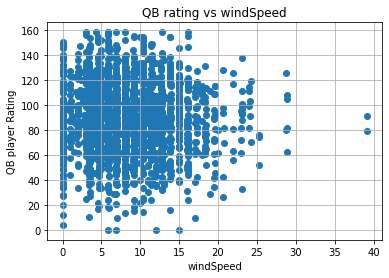

In [39]:
plt.title("QB rating vs windSpeed")
plt.xlabel("windSpeed")
plt.ylabel("QB player Rating")
plt.grid(True)
plt.scatter(weather_QB_pd["windSpeed"], weather_QB_pd["QB Rating"])

##### Linear Regression -- QB Rating vs Wind Speed
##### Compute the P-value.

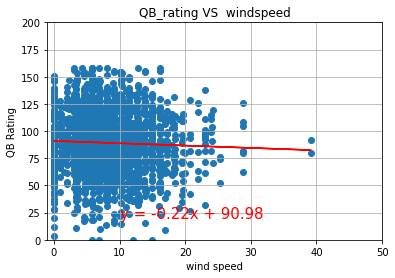

The r-squared value is: 0.0016491811495238102
 The p value of QB_rating VS  windspeed: 0.05083871831360816


In [60]:
x_values= weather_QB_pd["windSpeed"]
y_values= weather_QB_pd["QB Rating"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.title("QB_rating VS  windspeed")
plt.xlabel('wind speed')
plt.ylabel('QB Rating')
plt.xlim(-1,50)
plt.ylim(0,200)
plt.grid(True)
plt.show()
print(f"The r-squared value is: {rvalue**2}")
print(f" The p value of QB_rating VS  windspeed: {pvalue}")
#print(f" The y value of QB_rating VS  windspeed: {y}")

##### Graph -2 --- Scatter plot between QB rating and wind speed  to identify the Linear Regression and  to find the relationship between QB Rating ## and Wind speed 
###### Result : r squre value = 0.0016
##### There is a very little correlation between QB rating and Wind Speed 
###### Any estimate of a player's QB rating based on Wind Speed would be only 0.0016 correct.

##### Analysis of the r - value between Wind Speed and QB rating. The relationship between QB Rating vs. Wind Speed , there is very little correlation. Any estimate of a player's QB rating based on  Wind Speed  would be only 0.0045 correct based on R value. P-Value calculated by linear regression has no impact on rejected or accepting the  hypothesis. 
##### Lesson Learned:
  ##### Removed Na's otherwise r-value would be Na
  ##### P-Value calculated by linear regression has no impact on rejected or accepting the  hypothesis. 

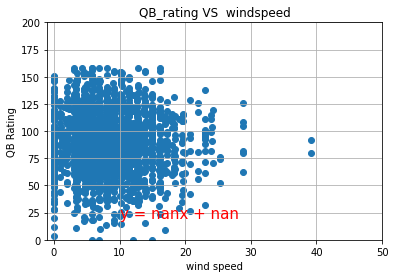

The r-squared value is: nan
 The p value of QB_rating VS  windspeed: nan


In [57]:
x_values= weather_QB_pd["windSpeed"]
y_values= weather_QB_pd["QB Rating"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.title("QB_rating VS  windspeed")
plt.xlabel('wind speed')
plt.ylabel('QB Rating')
plt.xlim(-1,50)
plt.ylim(0,200)
plt.grid(True)
plt.show()
print(f"The r-squared value is: {rvalue**2}")
print(f" The p value of QB_rating VS  windspeed: {pvalue}")
#print(f" The y value of QB_rating VS  windspeed: {y}")

###### Lesson Learned from Linear regression
###### 1) Clean up data first -- weather_QB_pd.dropna(inplace=True)
###### 2) P-Value calculated by linear regression can not be used to  rejected or accepting the hypothesis.


In [ ]:
##### Analysis of the r - value between Temperature and QB rating. The relationship between QB Rating vs. Temperature , there is very little correlation. Any estimate of a player's QB rating based on temperature would be only 0.0045 correct based on R value. P-Value calculated by linear regression has no impact on rejected or accepting the  hypothesis. 
##### Lesson Learned:
  ##### Removed Na's otherwise r-value would be Na
  ##### P-Value calculated by linear regression has no impact on rejected or accepting the  hypothesis. 

In [ ]:
##### Determine the acceptable significance value
##### Analysis of the p value
P value of QB rating and windspeed is 0.07, which is greater then 0.05.
if p value > 0.05, do not reject the null hypothesis